In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ./mnist/data\t10k-images-idx3-ubyte.gz
Extracting ./mnist/data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
learning_rate = 0.01
training_epoch = 20
batch_size = 100
n_hidden = 256
n_input = 28*28

In [4]:
X = tf.placeholder(tf.float32, [None, n_input])

In [6]:
W_encode = tf.Variable(tf.random_normal([n_input, n_hidden]))
b_encode = tf.Variable(tf.random_normal([n_hidden]))

encoder = tf.nn.sigmoid(tf.add(tf.matmul(X, W_encode), b_encode))

In [8]:
W_decode = tf.Variable(tf.random_normal([n_hidden, n_input]))
b_decode = tf.Variable(tf.random_normal([n_input]))

decoder = tf.nn.sigmoid(tf.add(tf.matmul(encoder, W_decode), b_decode))

In [9]:
cost = tf.reduce_mean(tf.pow(X - decoder, 2))
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(cost)

In [11]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

total_batch = int(mnist.train.num_examples / batch_size)

for epoch in range(training_epoch):
    total_cost = 0
    
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        _, cost_val = sess.run([optimizer, cost], feed_dict={X: batch_xs})
        total_cost += cost_val
        
    print('Epoch: ','%04d' % (epoch + 1),
          'Avg. Cost = ', '{:.4f}'.format(total_cost / total_batch))
    
print('최적화 완료!')

Epoch:  0001 Avg. Cost =  0.1944
Epoch:  0002 Avg. Cost =  0.0596
Epoch:  0003 Avg. Cost =  0.0465
Epoch:  0004 Avg. Cost =  0.0395
Epoch:  0005 Avg. Cost =  0.0368
Epoch:  0006 Avg. Cost =  0.0356
Epoch:  0007 Avg. Cost =  0.0346
Epoch:  0008 Avg. Cost =  0.0333
Epoch:  0009 Avg. Cost =  0.0325
Epoch:  0010 Avg. Cost =  0.0316
Epoch:  0011 Avg. Cost =  0.0311
Epoch:  0012 Avg. Cost =  0.0302
Epoch:  0013 Avg. Cost =  0.0299
Epoch:  0014 Avg. Cost =  0.0296
Epoch:  0015 Avg. Cost =  0.0290
Epoch:  0016 Avg. Cost =  0.0288
Epoch:  0017 Avg. Cost =  0.0282
Epoch:  0018 Avg. Cost =  0.0273
Epoch:  0019 Avg. Cost =  0.0272
Epoch:  0020 Avg. Cost =  0.0271
최적화 완료!


In [12]:
sample_size = 10

samples = sess.run(decoder, feed_dict={X: mnist.test.images[:sample_size]})

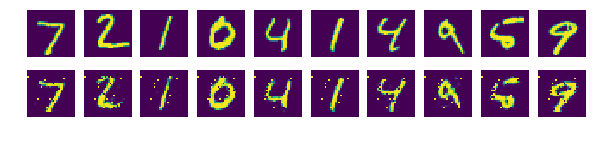

In [13]:
fig, ax = plt.subplots(2, sample_size, figsize=(sample_size, 2))

for i in range(sample_size):
    ax[0][i].set_axis_off()
    ax[1][i].set_axis_off()
    ax[0][i].imshow(np.reshape(mnist.test.images[i], (28,28)))
    ax[1][i].imshow(np.reshape(samples[i], (28,28)))
    
plt.show()